<a href="https://colab.research.google.com/github/greensky0107/first_repository/blob/master/MainQuest_4_%EC%B5%9C%EC%88%99%EC%96%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#데이터 처리
import pandas as pd
import numpy as np

#시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 통계툴
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

# 통계툴
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import t

문제 1)
빵집에서는 매일 아침에 구워지는 식빵 한 개의 평균 무게가 500g이 되도록 맞추고자 합니다.

빵집 주인은 오늘 아침에 구운 식빵 중에서 랜덤하게 25개의 식빵을 샘플링하여 무게를 측정했습니다.

그 결과, 표본 평균은 495g, 표준편차는 10g으로 나왔습니다.

빵집 주인이 목표한 500g의 무게를 충족하고 있는지(다시말해 목표 무게를 넘는지 안 넘는지)  5% 유의수준에서 검정해보세요.

[Code 작성전 검토 내용]

==가설 설정==
  귀무가설(H₀): 식빵의 평균 무게는 500g이다. (μ = 500)

  대립가설(H₁): 식빵의 평균 무게는 500g과 같지 않다. (μ≠ 500g)

==검정방법 결정==

* 검정방법 은  단일 표본 t-검정 (one-sample t-test. 모집단의 표준편차를 모르며 단일표본이며 N>30이 아니다.)  

목표무게를 넘는지 안 넘는지 이니, 양측 검정(two-tailed test)

* 주어진 data는

  모집단 평균 = 500
  표본 평균 = 495
  표본 표준편차 = 10
  표본 크기 = 25
  유의 수준 = 5%

In [ ]:
# 데이터
x_bar = 495
mu_0 = 500
s = 10
n = 25
alpha = 0.05

# t-값 계산
t_statistic = (x_bar - mu_0) / (s / np.sqrt(n))

# p-value 계산
df = n - 1
p_value = 2 * stats.t.cdf(t_statistic, df=df)

# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.")
else:
    print(f"t-값: {t_statistic:.4f}, p-value: {p_value:.4f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 빵의 평균 무게는 목표와 통계적으로 차이가 없습니다.")


t-값: -2.5000, p-value: 0.0197. 유의수준 0.05에서 귀무가설을 기각합니다. 빵의 평균 무게는 목표와 다릅니다.


답 1)  단일표본 t-test를 통해  검정통계량 t-값은 =2.5 이며,  p_value는 0.0197로  유의수준 0.05보다 크므로, 대립가설 채택한다.   식빵의 평균무게는 500g과 같지 않다.

### 문제2) 분포 시각화

문제 1번을 바탕으로 분포를 그리고 t통계량을 빨간색 점선으로, 초록색 점선으로 임계값을 기각역을 초록색으로 칠해보세요.

***기각역**:  통계량이 들어왔을 경우 귀무가설을 기각할 수 있는 영역을 말합니다.

[Code 작성 전 검토 내용]

기각역 - Rejection Region

초록색으로 칠하는 방법?

답 2)   아래 그래프

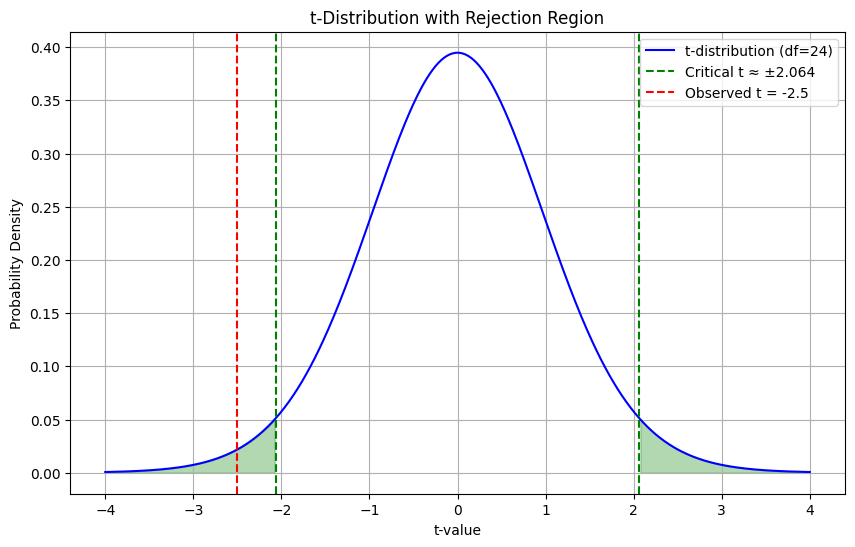

In [ ]:
# Data 설정
df = 24   # 자유도
alpha = 0.05   # 유의수준
t_critical = t.ppf(1 - alpha / 2, df)  # 임계값
t_statistic = -2.5  # 통계량

# x축과 y축 값
x = np.linspace(-4, 4, 500)
y = t.pdf(x, df)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='t-distribution (df=24)', color='blue')

# 기각역 음영 처리
plt.fill_between(x, y, where=(x <= -t_critical), color='green', alpha=0.3)
plt.fill_between(x, y, where=(x >= t_critical), color='green', alpha=0.3)

# 임계값 점선
plt.axvline(-t_critical, color='green', linestyle='dashed', label=f'Critical t ≈ ±{t_critical:.3f}')
plt.axvline(t_critical, color='green', linestyle='dashed')

# 관측된 t-값 점선
plt.axvline(t_statistic, color='red', linestyle='dashed', label=f'Observed t = {t_statistic}')

# 라벨과 제목
plt.title("t-Distribution with Rejection Region")
plt.xlabel("t-value")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()


### 문제 3) 단일 t 표본 검정

- 어느 학교에서 새로운 교육 프로그램을 도입한 후 학생들의 수학 성적이 향상되었는지 확인하려고 합니다. 프로그램 도입 후 무작위로 선택한 16명의 학생들의 수학 성적 평균은 78점이고, 모집단의 평균은 75점입니다. 모집단의 표준편차는 알 수 없다고 합니다.
- 유의수준 0.05에서 이 교육 프로그램이 성적 향상에 효과가 있는지 단일 표본 t-검정을 실시하세요.

수업시간에 양측검정을 기준으로 배웠습니다. 다시말하면 데이터의 평균이 특정 값과 같은지 아닌지(방향은 관심없음)입니다. 문제는 향상에 효과가 있는지 에 대한 물음입니다. 함수를 무엇을 어떻게 넣어야할지 고민해보세요!(힌트 scipy docs 참고)

[Code 작성 전 검토 내용]

==가설 설정==

귀무 가설 (H0):  새로운 교육 프로그램은 학생들의 수학 성적 향상에 효과가 없다.

대립 가설 (H1):  새로운 교육 프로그램은 학생들의 수학 성적을 향상시킨다.



==검정방법 결정==

검정방법 은 모집단의 표준편차를 모르니 단일 표본 t-검정 (one-sample t-test. 단일표본이며 N>30이 아니다.)

향상이 되었는 지, 한 방향만 관심, 단측 검정(one-tailed test)

주어진 data
표본(예시 data)의 평균 78
모집단의 평균 75  
모집단의 표준편차 모름
유의수준 0.05

In [ ]:
# 예시 데이터
sample_scores = np.array([79, 77, 80, 76, 78, 81, 75, 79, 77, 80, 78, 76, 82, 77, 79, 78])
sample_mean = np.mean(sample_scores)
n = len(sample_scores)
pop_mean = 75
alpha = 0.05

# 단일 표본 t-검정 (단측 검정, 표본 평균이 모집단 평균보다 큰지 확인)
t_statistic, p_value = stats.ttest_1samp(a=sample_scores, popmean=pop_mean, alternative='greater')

print(f"표본 평균: {sample_mean:.2f}")
print(f"표본 크기: {n}")
print(f"모집단 평균: {pop_mean}")
print(f"유의수준: {alpha}")
print(f"t-값: {t_statistic:.3f}")
print(f"p-value: {p_value:.3f}")

# 결과 출력
if p_value < alpha:
    print(f"t-값: {t_statistic:.3f}, p-value: {p_value:.3f}. 유의수준 {alpha}에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.")
else:
    print(f"t-값: {t_statistic:.3f}, p-value: {p_value:.3f}. 유의수준 {alpha}에서 귀무가설을 채택합니다. 교육프로그램은 효과가 없습니다")

표본 평균: 78.25
표본 크기: 16
모집단 평균: 75
유의수준: 0.05
t-값: 6.789
p-value: 0.000
t-값: 6.789, p-value: 0.000. 유의수준 0.05에서 귀무가설을 기각합니다. 교육프로그램은 효과가 있습니다.


답 3)  t_값 6.789,  p_value 0.000 으로  유의수준 0.05보다 작으므로  대립가설 채택.   새로운 교육은 학생들의 수학성적을 향상시킨다.

### 문제 4) 독립 표본 t 검정

- 한 연구소에서 두 가지 새로운 다이어트 프로그램의 효과를 비교하려고 합니다. 연구소는 두 그룹의 참가자들을 대상으로 12주간 다이어트 프로그램을 진행한 후 체중 감소량을 측정했습니다.
- 유의수준 5% 에서 두 그룹 간 평균 체중 감소량에 유의미한 차이가 있는지 독립 표본 t-검정을 실시하세요.


관찰연구에서는  두개의 그룹을 t검정을 할때 등분산성을 검정하게 됩니다.  scipy.stats.levene 문서를 읽고 등분산 검정 후 적절한 검정방법을 적용해보세요. 등분산 검정에도 역시 귀무가설과 대립가설이 존재합니다.

[Code 작성 전 검토 내용]

<scipy.stats.levene 에서>

The Levene test tests the null hypothesis that all input samples are from populations **with equal variances**. Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.

등분산성 검증방법이 Levene Test.  

1차로 Levene Test로 2개 그룹의 분산이 같음을 증명하고

귀무가설 : 두 그룹의 분산이 동일

대립가설 : 두 그룹의 분산이 다름



2차로 2 sample t-test로 진행

귀무가설 : 두 다이어트 프로그램 간 평균 체중 감소량에 유의미한 차이가 없다.

대립가설 : 두 다이어트 프로그램 간 평균 체중 감소량에 유의미한 차이가 있다.

In [ ]:
# 그룹 A와 B의 체중 감소량 데이터
group_A = np.array([5.1, 4.7, 6.2, 4.9, 5.3, 6.1, 5.0, 5.8, 4.8, 5.2])
group_B = np.array([4.3, 4.1, 3.8, 4.6, 4.0, 4.5, 3.7, 4.2, 3.9, 4.4, 3.5, 4.3])

# 유의수준
alpha = 0.05

# 1. 등분산성 검정 (Levene's test)
levene_statistic, levene_p_value = stats.levene(group_A, group_B)

print(f"Levene 통계량: {levene_statistic:.4f}")
print(f"Levene p-값: {levene_p_value:.4f}")

if levene_p_value < alpha:
    print("등분산성 검정 결과: 두 그룹의 분산이 다르다고 판단됩니다 (귀무 가설 기각).")
    equal_var = False
else:
    print("등분산성 검정 결과: 두 그룹의 분산이 동일하다고 판단됩니다 (귀무 가설 채택).")
    equal_var = True

# 2. 독립 표본 t-검정
if equal_var:
    t_statistic, p_value = stats.ttest_ind(group_A, group_B, equal_var=True)
    print("\n독립 표본 t-검정 (등분산 가정):")
else:
    t_statistic, p_value = stats.ttest_ind(group_A, group_B, equal_var=False)
    print("\n독립 표본 t-검정 (등분산 가정 안 함):")

print(f"t-통계량: {t_statistic:.4f}")
print(f"p-값: {p_value:.4f}")

# 3. 결론
if p_value < alpha:
    print(f"\n유의수준 {alpha}에서 귀무 가설을 기각합니다. 두 다이어트 프로그램 간 평균 체중 감소량에 유의미한 차이가 있다고 할 수 있습니다.")
else:
    print(f"\n유의수준 {alpha}에서 귀무 가설을 채택합니다. 두 다이어트 프로그램 간 평균 체중 감소량에 유의미한 차이가 있다고 할 수 없습니다.")

Levene 통계량: 1.2856
Levene p-값: 0.2703
등분산성 검정 결과: 두 그룹의 분산이 동일하다고 판단됩니다 (귀무 가설 채택).

독립 표본 t-검정 (등분산 가정):
t-통계량: 6.3898
p-값: 0.0000

유의수준 0.05에서 귀무 가설을 기각합니다. 두 다이어트 프로그램 간 평균 체중 감소량에 유의미한 차이가 있다고 할 수 있습니다.


답 4)  Levene Test로  두 그룹간 분산이 동일하다고 판단하고,   2 sample t-test로 두 그룹간 평균 체중 감소량에 차이가 있다고 판단됨.

### 문제 5) 대응표본 t검정

대응표본 t-검정은 두 집단간 평균 차이를 비교할 때 사용되는 점은 독립 t검정 동일하나, 같은 집단에서 두 번 수집할 때 사용되는 검정입니다.( ex 고혈압 투여 전후 환자 단일 그룹의 혈압의 차) `scipy.stats` docs에서 적절한 함수를 찾아보고 적용해보세요.


- 운동 프로그램 전후의 체중 변화를 분석하기 위해 10명의 참가자의 체중을 측정했습니다. 유의수준 5%에서 운동 프로그램이 체중 감소에 효과가 있는지 **대응 표본 t-검정**을 실시하세요.


- 또한, 대응표본t검정에서 등분산 검정이 필요한지 고민해봅시다.

[Code 작성 전 검토내용]

scipy 에서  대응 표본 t-검정 (paired t-test) 함수는
scipy.stats.ttest_rel(group A, group B)임


귀무가설 : 운동 프로그램이 체중 감소에 효과가 없다.

대립가설 : 운동 프로그램이 체중 감소에 효과가 있다.




* 대응표본 t 검정에서는 등분산 검정이 필요한가?
  아니다. 필요 없다.  

  대응표본 t 검정에서는 before group과  after group 각각의 분포를 비교하는 것이 아니라, after - before 라는 새로운 변수(각 개인의 체중 변화량.  after에서 before를 뺀 값)의 평균이 0과 유의미하게 다른지 검정하는 것.   

  대응 표본 t-검정에서는 각 쌍의 차이 값이 정규 분포를 따른다는 가정이 필요
  
  대응 표본 t-검정에서는 두 그룹의 원래 데이터에 대한 등분산성 검정보다는 쌍을 이룬 차이 데이터의 분포에 더 집중.


In [ ]:
# 운동 전후 체중 데이터
before = np.array([70, 80, 65, 90, 75, 85, 78, 82, 68, 73])
after = np.array([68, 78, 64, 88, 74, 83, 77, 80, 67, 72])

# 대응 표본 t-검정
t_stat, p_value = stats.ttest_rel(before, after)

print(f"t-통계량: {t_stat:.4f}, p-값: {p_value:.4f}")

# 유의수준 5%에서 검정결과 해석
alpha = 0.05
if p_value < alpha:
    print("운동 프로그램이 체중 감소에 통계적으로 유의한 영향을 미칩니다.")
else:
    print("운동 프로그램이 체중 감소에 유의한 영향을 미친다고 볼 수 없습니다.")



t-통계량: 9.0000, p-값: 0.0000
운동 프로그램이 체중 감소에 통계적으로 유의한 영향을 미칩니다.


답 5)  paired t-test의 p_value 0.0000으로  유의수준 0.05보다 작으므로,  대립가설 채택.    

운동 프로그램이 체중감소에 효과가 있다.

### 문제 6) 표본 추출

- Quest 05-01의  Online Retail II 데이터에서 표본을 추출하여 모집단의 평균을 추정해보세요.
- 영국(United Kingdom)에서 주문된 데이터 에서 30개, 100개, 300개의 샘플을 무작위 추출하여 평균 구매 금액(Total Price)를 계산해보세요. 표본의 크기가 커질 수록 모집단의 평균과 가까워지는지 확인해보세요.

[Code 작성 전 검토내용]

주어진 data cleansing 필요

1. 영국만 추려내야함.  
2. data table의 price는 unit price이므로, 구매 금액 (total price)는 quantity 와 price의 곱셈임.
3. 모집단 (UK의 주문 data)의 평균 구매금액(total price)  구해야함

data cleansing후,  row는 1,067,354 개임.

무작위 추출로 표본의 평균을 구해서,  표본의 크기가 커질수록, 표본의 평균이 모집단의 평균에 근접함을 보여주어야함.

무작위 추출로 표본이 어느 정도로 커졌을 때,  poulation mean과 같을까?

30, 100, 300, 500, 1000, 3000, 5000, 7000, 9000, 100000, 200000, 300000, 400000, 500000으로 확인

In [ ]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("mashlyn/online-retail-ii-uci")
print("Path to dataset files:", path)
retail = pd.read_csv(path + '/' + os.listdir(path)[0])
retail.head()


Path to dataset files: /kaggle/input/online-retail-ii-uci


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [ ]:
# Data Cleaning 영국만 남기고, Total Price 구하고,  0 초과인 값만 남김.
retail_uk = retail[retail['Country'] == 'United Kingdom']
retail_uk = retail_uk.dropna(subset=['Quantity', 'Price'])
retail_uk['TotalPrice'] = retail_uk['Quantity'] * retail_uk['Price']
retail_uk = retail_uk[retail_uk['TotalPrice'] > 0]

# 3. 모집단의 구매금액의 평균
population_mean = retail_uk['TotalPrice'].mean()

# retail_uk 확인
retail_uk.info()

# 4. 표본 추출 및 평균 계산
sample_sizes = [30, 100, 300, 500, 1000, 3000, 5000, 7000, 9000, 100000, 200000, 300000, 400000, 500000]
sample_means = {}

for size in sample_sizes:
    sample = retail_uk.sample(n=size, random_state=42)
    sample_mean = sample['TotalPrice'].mean()
    sample_means[size] = sample_mean

# 결과 출력
print(f"population mean: {population_mean:.2f}")
for size, mean in sample_means.items():
    print(f"sample size {size}   mean total price: {mean:.2f}")

<class 'pandas.core.frame.DataFrame'>
Index: 958502 entries, 0 to 1067354
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      958502 non-null  object 
 1   StockCode    958502 non-null  object 
 2   Description  958502 non-null  object 
 3   Quantity     958502 non-null  int64  
 4   InvoiceDate  958502 non-null  object 
 5   Price        958502 non-null  float64
 6   Customer ID  725250 non-null  float64
 7   Country      958502 non-null  object 
 8   TotalPrice   958502 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 73.1+ MB
population mean: 18.65
sample size 30   mean total price: 16.98
sample size 100   mean total price: 17.66
sample size 300   mean total price: 14.39
sample size 500   mean total price: 16.29
sample size 1000   mean total price: 16.23
sample size 3000   mean total price: 19.30
sample size 5000   mean total price: 18.10
sample size 7000   mean total price: 17

답 6)   sample size가 커질 수록, 표본 평균은 모집단 평균에 가까워진다고 할 수 있음.

sample size가 9000 정도까지 커졌을 때부터  sample mean이,  population의 mean과 비슷해지기 시작함.   

### 문제 7) 신뢰구간

- 영국 데이터에서 TotalPrice를 사용하여 95% 신뢰 구간을 계산하세요. 또한 표본의 크기가 30,100, 300으로 변하면서 신뢰구간이 변하는 형태를 확인해 보세요.


- Hint) `stats` 모듈에서 신뢰구간을 바로 구하는 함수를 확인해보세요.

In [ ]:
import scipy.stats as stats

# 신뢰구간 계산 함수  stats.interval()  과  stats.sem()
def confidence_interval(TotalPrice, confidence=0.95):
    mean = TotalPrice.mean()
    std_err = stats.sem(TotalPrice)
    interval = stats.t.interval(confidence, len(TotalPrice)-1, loc=mean, scale=std_err)
    return mean, interval


# 샘플 크기에 따른 신뢰 구간 비교
sample_sizes = [30, 100, 300, 500, 1000, 9000, 100000, 300000]
for size in sample_sizes:
    sample = retail_uk['TotalPrice'].sample(size, random_state=42)
    mean, interval = confidence_interval(sample)
    print(f"Sample size: {size}, Mean: {mean:.2f}, 95% CI: ({interval[0]:.2f}, {interval[1]:.2f})")



Sample size: 30, Mean: 16.98, 95% CI: (8.89, 25.06)
Sample size: 100, Mean: 17.66, 95% CI: (12.02, 23.30)
Sample size: 300, Mean: 14.39, 95% CI: (10.71, 18.07)
Sample size: 500, Mean: 16.29, 95% CI: (12.72, 19.86)
Sample size: 1000, Mean: 16.23, 95% CI: (14.09, 18.38)
Sample size: 9000, Mean: 18.21, 95% CI: (16.90, 19.53)
Sample size: 100000, Mean: 18.41, 95% CI: (18.02, 18.79)
Sample size: 300000, Mean: 18.82, 95% CI: (17.69, 19.94)


답 7) Sample Size가 커질수록 신뢰구간이 좁아짐.

sample size 30일 때는 95% 신뢰구간이 16.98 +/- 8.09로 넓음.

sample size 300일 때는 95% 신뢰구간이 14.39 +/- 3.68로 좁아짐.

sample size 9000일 때는 95% 신뢰구간이 18.21 +/- 1.31로 더 좁아짐.

### 문제 8 가설검정 t-test

- 영국과 독일의 고객의 평균 구매금액(Total Price)가 동일한지 검정해보세요. 귀무가설과 대립가설을 세우고 통계검정을 통해 결과를 해석하세요
- 영국과 독일의 분포는 등분산성은 따른다고 가정

[Code 작성전 검토 내용]

==가설 설정==
귀무가설 (H₀): 영국과 독일 고객의 평균 구매금액은 차이가 없다.

대립가설 (H₁): 영국과 독일 고객의 평균 구매금액은 차이가 있다.

=검증방법 결정==
대응이 아닌 독립적인 2개의 표본을 비교.
영국과 독일의 분포는 등분산성을 따른다고 가정.

2 sample t-test (함수식  stats.ttest_ind)


In [ ]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [ ]:
#1. retail data frame에  TotalPrice column 만들기
retail = retail.dropna(subset=['Quantity', 'Price'])
retail['TotalPrice'] = retail['Quantity'] * retail['Price']
retail = retail[retail['TotalPrice'] > 0]

# 2. UK와 Germany만 선택해서 비교를 위한 data group 만들기
uk = retail[retail['Country'] == 'United Kingdom']['TotalPrice']
germany = retail[retail['Country'] == 'Germany']['TotalPrice']

# 3. 독립표본 t-검정 (등분산 가정)
t_stat, p_value = stats.ttest_ind(uk, germany, equal_var=True)  # 등분산 가정이 같다= equal_var=True

# 4. 결과 출력
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")

# 5. 해석
if p_value < 0.05:
    print("→ 유의수준 0.05에서 귀무가설 기각: 영국과 독일 고객의 평균 구매 금액에 유의미한 차이가 있습니다.")
else:
    print("→ 유의수준 0.05에서 귀무가설 채택: 영국과 독일 고객의 평균 구매 금액에 유의미한 차이가 없습니다.")

T-statistic: -4.425
P-value: 0.0000
→ 유의수준 0.05에서 귀무가설 기각: 영국과 독일 고객의 평균 구매 금액에 유의미한 차이가 있습니다.


답 8) p_value가 0.0000으로  유의수준 0.05보다 작으므로 대립가설 채택.    영국과 독일 고객의 평균 구매 금액에 유의미한 차이가 있다.

A/B test스타트업A에서 새로운 여행 패키지 상품 판매를 진행하고자 합니다. 패키지 판매 기획자는 새로운 패키지의 상품 판매 효율을 높이고 싶어하며, 이를 위해 기존에 상품이 판매되던 웹 페이지 (페이지 A) 가 아닌 새로운 웹 페이지 (페이지 B)를 통해 판매하고자 합니다. 패키지 판매 기획자는 신규 웹페이지 (페이지 B) 가 기존 (페이지 A) 대비 효과가 좋은 지 확인하기 위해 A/B 테스트를 진행하였습니다.

- 페이지 A: 기존에 운영하던 패키지 판매 웹 페이지
- 페이지 B: 새롭게 생성한 패키지 판매 웹 페이지

두 페이지는 스타트업A 패키지 판매 사이트에 접속하는 유저에게 랜덤으로 노출되었고, 테스트 결과는 다음과 같습니다.


페이지 A 노출수 1000  구매수 80


페이지 B 노출수 200  구매수 22

## **문제9)**

- 결과를 바탕으로 패키지 기획자는 페이지 B의 효과에 대해 어떤 결정을 해야 할지 서술해 주세요.
- Hint) https://abtestguide.com/calc/  를 사용하여 해석해보세요

답 9)

본 a/b test의 가설은 다음과 같다.

==가설 설정==

귀무가설 : Page A의 전환율이 높다

대립가설 : Page B의 전환율이 높다.

신뢰구간 95%, 유의수준 5% (industry norm) 으로 가정.  


==결과 해석==

전환율을 보면 Page B가 11%,  Page A가 8% 이니, Page B가 winner라고 보인다.

하지만, A/B-test Guide의 검정을 통한 p_value가 0.1031이므로 귀무가설을 채택하게된다.   따라서 Page B의 전환율 11%가 유의미하다고 볼 수 없다.  

Z-score가 1.2642로 1.96보다 작으므로 통계적으로 유의미한 차이가 없다.  따라서 귀무가설을 기각할 수 없으며, 대립가설을 지지할 근거가 부족하다.   따라서 Page B의 전환율이 높다고 볼 수 없다.

또한,  Page A와 Page B의 data 분포가 차이가 난다.

Page A의 경우, 분포가 좁고 높아서, 표준오차가 작다고 할 수 있으며, 데이터 갯수가 충분하다고 판단된다.

Page B의 경우, 분포가 넓고 낮아서, 표준오차가 크다고 할 수 있으며, 데이터의 갯수가 적다고 판단된다.

Page A와 Page B의 전환율을 비교해봤을 때,  Page B의 전환율이 오른쪽으로 치우쳐 전환율이 높은 경향이 있다고 할 수 있다.   하지만 Page B의 전환율은 분포가 넓어서 불확실성이 크다.

결론적으로,  주어진 test data로는  Page B가 Page A보다 통계적으로 유의미한 차이를 보이며 전환율이 높다고 확신하기 어렵다.



## **문제 10)**

- A/B 테스트의 결과가 통계적으로 유의하나 효과의 차이 자체는 매우 작은 경우, 어떤 의사결정을 할 수 있을지 사례를 통해 설명해 주세요.
- Hint) A/B 관련 자료를 찾아보세요(추천 문헌 [요즘IT](https://yozm.wishket.com/))

답 10)

위의 예제의 경우는 통계적으로 유의하지는 않다.  

data 분석에 따른 action item은  2가지로 제시할 수 있다.

먼저, action item 1은, Page A와 Page B의 표본 크기를 재설정 해서, test를 연장하여 진행하는 방법이다.

위의 예제의 a/b test의 결과중 Page A와 Page B의 분포를 검토했을때,  Page B의 데이터 갯수가 적다고 판단되므로, Page B의 표본의 크기를 늘리며  test 를 연장하는 방법을 찾아야한다.

MDE (minimum detectable effect)를 Page B의 전환율 11% 와 Page A의 전환율 8%의 차이 (즉 3%%)로 정하고,  이를  95% 신뢰 수준에서 80% 검정력으로 탐지할 수 있는 표본의 크기를 계산해 볼 수 있다.
이때 각각의 그룹에 최소 1,041명이 있어야하므로,  Page B의 표본의 추가 확보가 있어야만 한다.

하지만 공정성을 유지하며  Page A와 Page B의 노출을 늘려야 한다.   따라서, Page B의 노출만을 늘리기 위해서 광고를 집행하면 안된다.   

공정성을 유지하기 위해, 유저에게 노출되는 page를 랜덤 분배에서 비율 (e.g. a:30% b:70%)로  조정하거나,  동일 조건에서 A/B광고를 각각 집행해보는 방법이 있을 수 있다.

action item 2로는, 다른 지표도 검토해보는 방법이다.   노출에서 구매까지의 각 단계에서  Page A와 Page B가 차이를 보이는 지표를 발견해서 Page B에서 고객의 경험을 긍정적으로 향상시킬 방향을 찾아볼 수있다.   

고려해볼 다른 지표는 아래같이 7가지를 들어볼 수 있다.

페이지 노출후 클릭하는 클릭율 (CTR),

페이지별 체류시간 (session duration rate 1분이상),

이탈률 (bounce rate 첫 페이지 방문 후 아무런 상호작용 없이 떠나는 비율),

페이지별 클릭이 일어난 contetns (혹은 장소),

장바구니에 담은 비율,

재방문율, 재방문까지 걸리는 시간 (다시 방문한 비율 또는 재방문까지 걸린 시간)

desktop과 mobile에서의  클릭률과 체류시간, 전환율의 차이

[회고작성]

문제 1번 ~ 8번까지는 가설 검증 방법의 수업교안 및 문제에 나와있는 direction을 보면서 천천히 풀 수 있었다.     가설을 세우고,  검증방법으로 어떤 것을 써야하는 지,  문제에 있는 hint를 최대한 찾아내려고 노력했다.

검증방법 함수 자체는 몇줄 안되지만,  검증하고자 하는 내용을 이해하고 가설을 세우고,  채택 논리를 숫자를 포함해서 정리하는 방법을 익히려고 했다.

기술적으로는 문제 2번의 그래프에서 색칠하는 방법 찾기가 어려웠다.    

문제 9번과 10번은 A/B test guide의 계산기를 쓰면 되어서, code 작성과는 상관이 없었다.   

문제 9번은 주어진 data가  통계적으로 유의미하지 않음을 설명하여야 하는 것으로 이해하고 답을 작성했다.    순수 전환율 8%와 11%만 보자면,  page B의 전환율이 높다고 할 수 있으나,  page B의 data 갯수가 너무 작아서 통계적으로 유의미하지 않음을 설명했다.

문제 10번지문에서 "A/B 테스트의 결과가 통계적으로 유의하나 효과의 차이 자체는 매우 작은 경우"가  문제 9번과 연결되지 않는 내용으로 보인다.

그래서 "A/B 테스트의 결과가 통계적으로 유의하지 않을때"로  상정하고 문제 9번 상황에 대한 action item 2가지를 기술했다.
